In [28]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('all_seasons.csv')

month_to_year = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06',
                 'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}

def format_season(season):
    parts = season.split('-')
    month = parts[0]
    year = int(parts[1])
    if year < 50:
        year += 2000
    else: 
        year += 1900
    next_year = year + 1
    return f"{year}-{next_year % 100:02d}"

data['season'] = data['season'].replace(month_to_year, regex=True).apply(format_season)

# 湖人总冠军

In [29]:
#找总冠军年份，将球员全部筛选出
selected_seasons = ['1999-00', '2000-01', '2001-02', '2008-09', '2009-10', '2019-20']
team_abbreviation = 'LAL'
lakers_data = data[(data['team_abbreviation'] == team_abbreviation) & (data['season'].isin(selected_seasons))]
lakers_data.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
887,887,Derek Harper,LAL,37,193.04,93.439952,Illinois,USA,1983,1,...,6.9,1.5,4.2,-2.6,0.014,0.052,0.143,0.506,0.255,1999-00
900,900,Derek Fisher,LAL,24,185.42,90.718400,Arkansas-Little Rock,USA,1996,1,...,5.9,1.8,3.9,8.9,0.023,0.074,0.149,0.497,0.256,1999-00
925,925,Dennis Rodman,LAL,38,200.66,95.254320,Southeastern Oklahoma State,USA,1986,2,...,2.1,11.2,1.3,-1.4,0.114,0.348,0.065,0.388,0.063,1999-00
950,950,J.R. Reid,LAL,31,208.28,112.037224,North Carolina,USA,1989,1,...,9.0,5.2,1.2,-0.7,0.055,0.181,0.180,0.547,0.081,1999-00
951,951,Glen Rice,LAL,32,203.20,99.790240,Michigan,USA,1989,1,...,17.5,3.7,2.6,4.2,0.011,0.108,0.224,0.542,0.118,1999-00


C:\Users\ethan\AppData\Local\Temp\ipykernel_13600\1511901116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lakers_data['total_points'] = lakers_data['pts'] * lakers_data['gp']


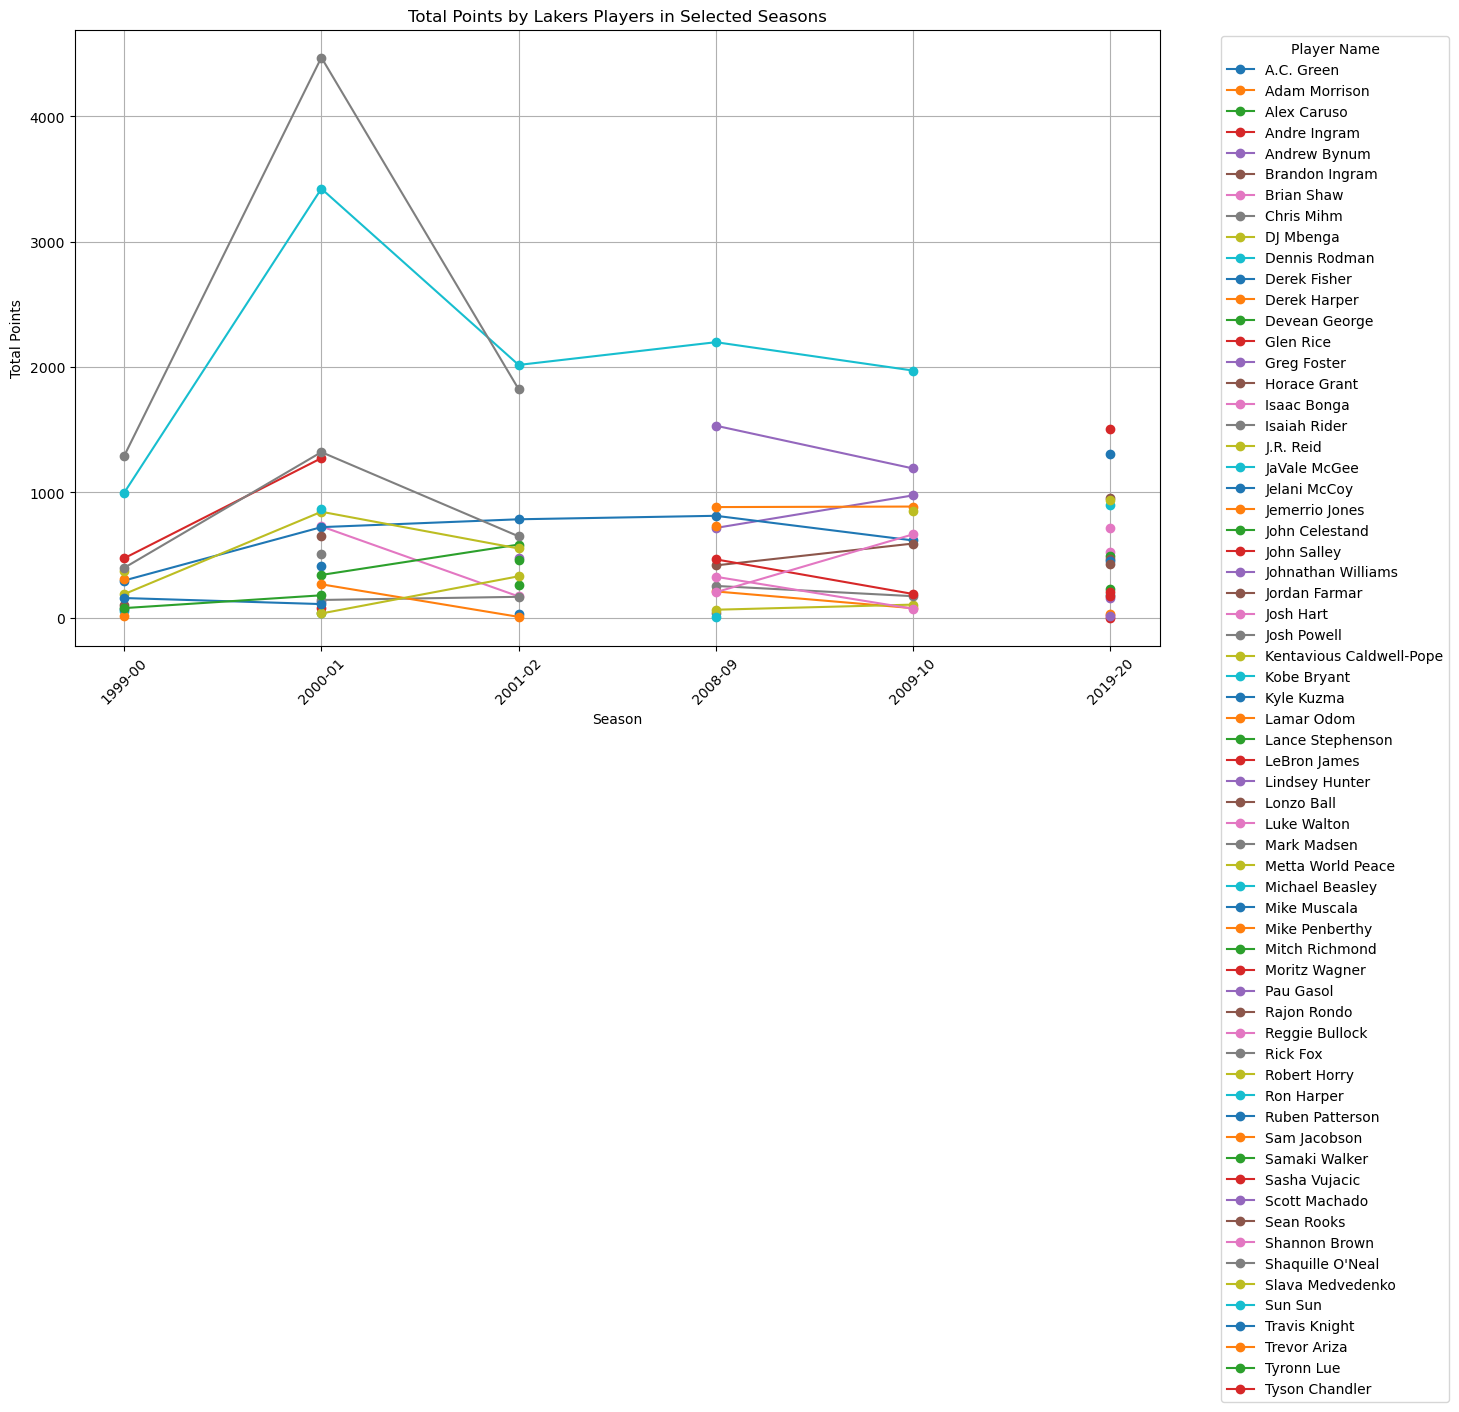

In [30]:
#line graph
lakers_data['total_points'] = lakers_data['pts'] * lakers_data['gp']
player_season_points = lakers_data.groupby(['player_name', 'season'])['total_points'].sum().reset_index()
pivot_data = player_season_points.pivot(index='season', columns='player_name', values='total_points')

plt.figure(figsize=(14, 8))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], marker='o', label=column)

plt.title('Total Points by Lakers Players in Selected Seasons')
plt.xlabel('Season')
plt.ylabel('Total Points')
plt.xticks(rotation=45)
plt.legend(title='Player Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [31]:
#data cleaning:  贡献全队得分0.1%及以下的球员被删除
#run这个cell后的新run pie chart更简洁

lakers_data['total_points'] = lakers_data['pts'] * lakers_data['gp']
player_season_total = lakers_data.groupby(['player_name', 'season'])['total_points'].sum().reset_index()
team_season_total = lakers_data.groupby('season')['total_points'].sum().reset_index()
merged_data = pd.merge(player_season_total, team_season_total, on='season', suffixes=('_player', '_team'))
merged_data['contribution_pct'] = (merged_data['total_points_player'] / merged_data['total_points_team']) * 100
filtered_data = merged_data[merged_data['contribution_pct'] >= 0.1] #如果需要调整0.1%为其他值的话更改这个数就可以
new_data = filtered_data.pivot_table(index='season', columns='player_name', values='contribution_pct', fill_value=0)
new_data.head()

C:\Users\ethan\AppData\Local\Temp\ipykernel_13600\1446175832.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lakers_data['total_points'] = lakers_data['pts'] * lakers_data['gp']


player_name,A.C. Green,Adam Morrison,Alex Caruso,Andrew Bynum,Brandon Ingram,Brian Shaw,Chris Mihm,DJ Mbenga,Dennis Rodman,Derek Fisher,...,Sasha Vujacic,Scott Machado,Sean Rooks,Shannon Brown,Shaquille O'Neal,Slava Medvedenko,Travis Knight,Trevor Ariza,Tyronn Lue,Tyson Chandler
season,,,,,,,,,,,,,,,,,,,,,
1999-00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.014365,6.195397,...,0.000000,0.0,2.041331,0.000000,27.064432,0.000000,3.263609,0.000000,1.575101,0.0
2000-01,2.483148,0.000000,0.0,0.000000,0.0,4.405468,0.000000,0.000000,0.000000,4.369129,...,0.000000,0.0,0.000000,0.000000,27.072974,0.195018,0.648647,0.000000,1.073204,0.0
2001-02,0.000000,0.000000,0.0,0.000000,0.0,2.027434,0.000000,0.000000,0.000000,9.450110,...,0.000000,0.0,0.000000,0.000000,21.966684,3.965671,0.000000,0.000000,0.000000,0.0
2008-09,0.000000,2.353687,0.0,8.090798,0.0,0.000000,0.407369,0.702711,0.000000,9.186168,...,5.250532,0.0,0.000000,2.281266,0.000000,0.000000,0.000000,8.258272,0.000000,0.0
2009-10,0.000000,0.891840,0.0,11.687424,0.0,0.000000,0.000000,1.233473,0.000000,7.372068,...,2.248780,0.0,0.000000,7.961833,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


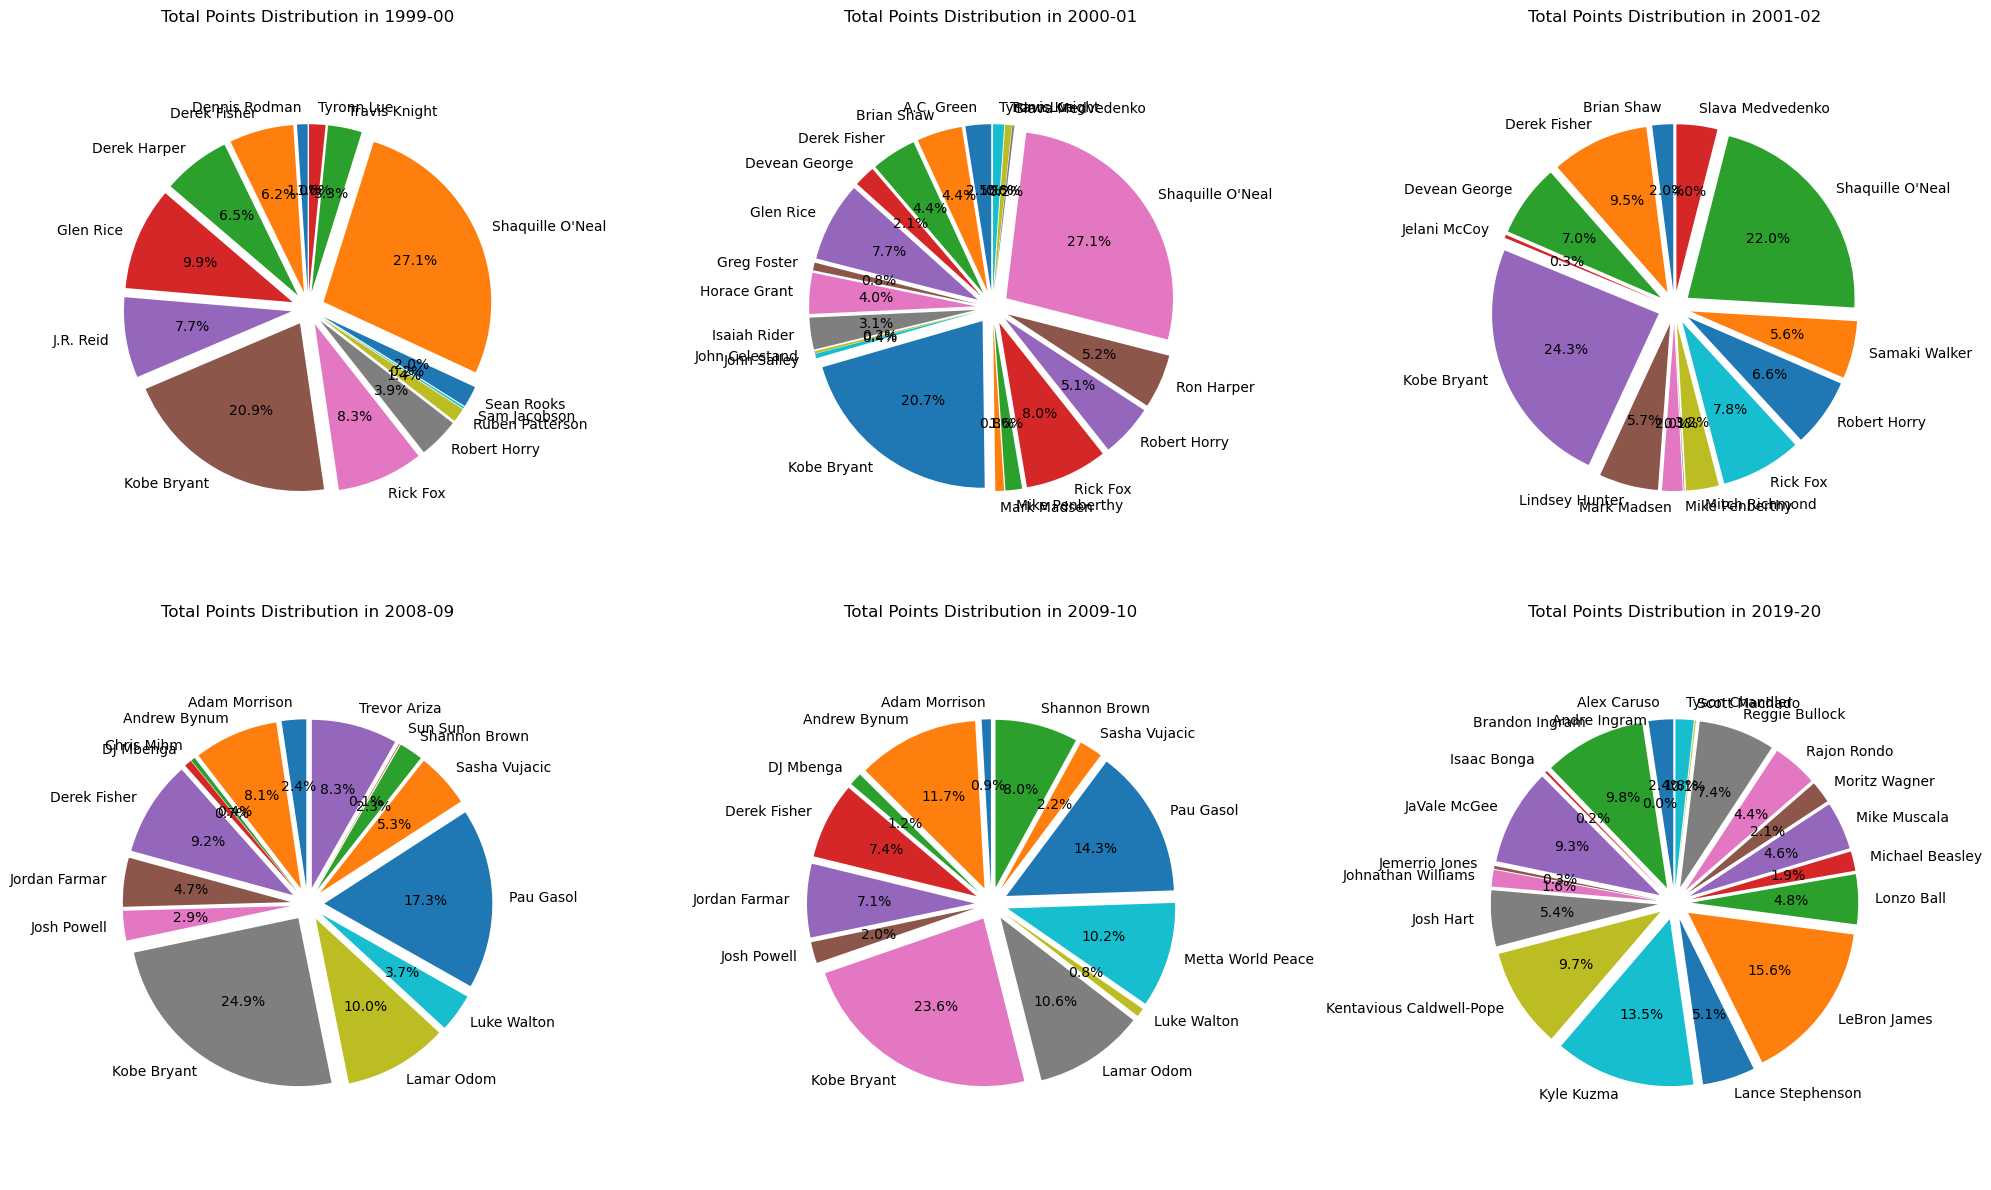

In [32]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, season in enumerate(selected_seasons):
    sizes = pivot_data.loc[season].dropna()
    if sizes.empty or sizes.sum() == 0:
        axes[i].axis('off')
        continue
    explode = [0.1 if size > 5 else 0.0 for size in sizes]
    wedges, texts, autotexts = axes[i].pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=90, explode=explode, textprops={'fontsize': 10})
    axes[i].set_title(f'Total Points Distribution in {season}')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()


In [33]:
# 提取每个chart里面的球员数据
for season in selected_seasons:
    season_data = filtered_data[filtered_data['season'] == season]
    print(f"Data for season {season}:")
    print(season_data[['player_name', 'total_points_player']])
    print("\n")


Data for season 1999-00:
         player_name  total_points_player
82     Dennis Rodman                 48.3
83      Derek Fisher                295.0
84      Derek Harper                310.5
85         Glen Rice                472.5
86         J.R. Reid                369.0
87       Kobe Bryant                995.0
88          Rick Fox                396.0
89      Robert Horry                186.2
90   Ruben Patterson                 64.8
91      Sam Jacobson                  8.0
92        Sean Rooks                 97.2
93  Shaquille O'Neal               1288.7
94     Travis Knight                155.4
95        Tyronn Lue                 75.0


Data for season 2000-01:
         player_name  total_points_player
0         A.C. Green                410.0
1         Brian Shaw                727.4
2       Derek Fisher                721.4
3      Devean George                339.7
4          Glen Rice               1272.0
5        Greg Foster                124.0
6       Horace Grant    

In [36]:
#索引原始data的对应数据，分别存入六个csv，每个csv包含当赛季湖人队中得分超过全队总分0.1%(cell 4中改动)的球员数据

data = pd.read_csv('all_seasons.csv')

month_to_year = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06',
                 'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}

def format_season(season):
    parts = season.split('-')
    month = parts[0]
    year = int(parts[1])
    if year < 50:
        year += 2000
    else:
        year += 1900
    next_year = year + 1
    return f"{year}-{next_year % 100:02d}"

data['season'] = data['season'].replace(month_to_year, regex=True).apply(format_season)
description = {
    'gp': 'Games Played.',
    'pts': '(场均得分) points (per game).',
    'reb': '(篮板) Rebounds. The number of times a team or player recovers the ball after a missed shot attempt.',
    'ast': '(助攻) how many of this person\'s teammates made goals were a result of that player\'s assists.',
    'net_rating': '(每百回合净胜分) the team\'s point differential per 100 possessions while he is on court.',
    'oreb_pct': '(抢下进攻篮板百分比) the percentage of team offensive rebounds grabbed by a player or team.',
    'dreb_pct': '(抢下防守篮板百分比) the percentage of team defensive rebounds grabbed by a player or team.',
    'usg_pct': '(结束控球百分比(被犯规，没投进)) the percentage of his team\'s possessions that a player ends (via field goal attempts, turnovers and trips to the line) while he\'s on the floor.',
    'ts_pct': '(真实投篮命中率(罚球被加权)) Pts/(2*(FGA + (.44*FTA)))',
    'ast_pct': '(助攻率) The percentage of a team\'s assists that a player has while on the court.'
}

description_text = "# Column Descriptions:\n" + "\n".join([f"# {key}: {value}" for key, value in description.items()])


selected_seasons = ['1999-00', '2000-01', '2001-02', '2008-09', '2009-10', '2019-20']
for season in selected_seasons:
    players_in_season = filtered_data[filtered_data['season'] == season]['player_name'].unique()
    season_players_data = data[(data['player_name'].isin(players_in_season)) & (data['season'] == season)]

    # Save with description on top
    with open(f'lakers_data_{season}.csv', 'w', encoding='utf-8') as file:
        file.write(description_text + "\n")  # Write the description as comments on the first lines
        season_players_data.to_csv(file, index=False)

In [38]:
data = pd.read_csv('lakers_data_2000-01.csv', comment='#')
data = data.loc[data.groupby('player_name')['gp'].idxmax()]
data.to_csv('lakers_data_2000-01.csv', index=False)